### Package Imports and Settings

In [38]:
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import tikzplotlib
import math

#Set display options
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_colwidth', -1)

#random.seed(1)
#np.random.seed(1)

### Import Data

In [39]:
data = pd.read_csv('../data/grad_school.csv', decimal=",", delimiter = ';')
data = data.apply(pd.to_numeric)

### Data Preprocessing

In [40]:
data = data.drop(['Admit','Help_1','Help_2','Help_3','Help_4','Help_5','Help_6'], axis = 1)
data.head()

#data = data.sample(frac=1).reset_index(drop=True)

,ID,Gender_F,Gender_M,Race_B,Race_A,Race_W,GRE_Verbal,GRE_Quant
0,1,1,0,1,0,0,149,165
1,2,1,0,0,1,0,164,159
2,3,1,0,0,0,1,140,153
3,4,0,1,1,0,0,149,156
4,5,0,1,0,1,0,153,154


### Define Legitimate Features

In [41]:
data_cluster = data.drop(['ID','Gender_M','Gender_F','Race_W','Race_B','Race_A'], axis = 1)
data_cluster.head()

,GRE_Verbal,GRE_Quant
0,149,165
1,164,159
2,140,153
3,149,156
4,153,154


### Standardize Data

In [42]:
#Standardize the data
#data_cluster['GRE_Verbal'] = ((data_cluster['GRE_Verbal']-data_cluster['GRE_Verbal'].mean())/data_cluster['GRE_Verbal'].std())
#data_cluster['GRE_Quant'] = ((data_cluster['GRE_Quant']-data_cluster['GRE_Quant'].mean())/data_cluster['GRE_Quant'].std())

### Transform to NumPy Array

In [43]:
data_cluster_array = data_cluster.to_numpy()

### Compute Distances to North Star

In [44]:
temp = list()
for i in range(0,len(data_cluster_array)):
    dist = np.linalg.norm(data_cluster_array[i]-[170,170])
    temp.append(dist)
    
data['Distance'] = temp

### Define Resource Constraint

In [45]:
alpha = 0.5

### Sort Data by Distance

In [46]:
data = data.sort_values(by=['Distance'])
data = data.reset_index(drop=True)

### Assign new Labels

In [47]:
temp = list()
cutoff = math.ceil(len(data)*alpha)
for i in range(0,len(data)):
    if (i<cutoff):
        temp.append(1)
    else:
        temp.append(0)
        
data['Admit'] = temp

### Scatter Plot of Labels

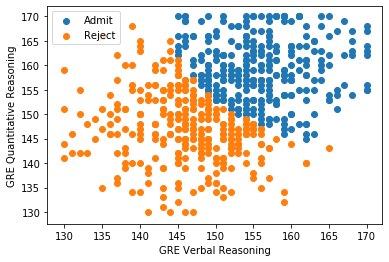

In [48]:
data_admit = data[data['Admit']==1]
data_reject = data[data['Admit']==0]

plt.scatter(data_admit['GRE_Verbal'], data_admit['GRE_Quant'], label='Admit')
plt.scatter(data_reject['GRE_Verbal'], data_reject['GRE_Quant'], label='Reject')
plt.legend(loc="upper left")
plt.xlabel('GRE Verbal Reasoning')
plt.ylabel('GRE Quantitative Reasoning');
#tikzplotlib.save('alpha5perc.tex')

### Compare Positive Outcome Distribution of all Combinations of Sensitive Attributes (Group Fairness)

In [49]:
#Group fairness
print(len(data[(data.Gender_F == 1) & (data.Admit == 1)]))
print(len(data[(data.Gender_M == 1) & (data.Admit == 1)]))
print('---')
print(len(data[(data.Race_B == 1) & (data.Admit == 1)]))
print(len(data[(data.Race_A == 1) & (data.Admit == 1)]))
print(len(data[(data.Race_W == 1) & (data.Admit == 1)]))
print('---')
print(len(data[(data.Gender_F == 1) & (data.Race_B == 1) & (data.Admit == 1)]))
print(len(data[(data.Gender_F == 1) & (data.Race_A == 1) & (data.Admit == 1)]))
print(len(data[(data.Gender_F == 1) & (data.Race_W == 1) & (data.Admit == 1)]))
print('---')
print(len(data[(data.Gender_M == 1) & (data.Race_B == 1) & (data.Admit == 1)]))
print(len(data[(data.Gender_M == 1) & (data.Race_A == 1) & (data.Admit == 1)]))
print(len(data[(data.Gender_M == 1) & (data.Race_W == 1) & (data.Admit == 1)]))

147
153
---
96
106
98
---
45
51
51
---
51
55
47
